<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import zipfile
import cv2
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
from matplotlib.pyplot import imshow
from PIL import Image               # to load images
from IPython.display import display # to display images

use the google.colab package to manage files and folders in Colab. Just upload everything you need to your google drive, then import

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Check the contents of the drive by executing the above command and ensure that your folder/data is displayed in the output.

In [ ]:
!unzip gdrive/MyDrive/Fish.zip
#zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Fish.zip', 'r') #Opens the zip file in read mode
#zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
#zip_ref.close()

Archive:  gdrive/MyDrive/Fish.zip
   creating: Foto fresco congelato/
   creating: Foto fresco congelato/fenomeni autolitici/
  inflating: Foto fresco congelato/fenomeni autolitici/44682_1_3 B.jpg  
  inflating: Foto fresco congelato/fenomeni autolitici/44682_1_3.jpg  
  inflating: Foto fresco congelato/fenomeni autolitici/52928_1_1.jpg  
  inflating: Foto fresco congelato/fenomeni autolitici/52949_1_1.jpg  
   creating: Foto fresco congelato/orata congelata/
  inflating: Foto fresco congelato/orata congelata/orata_103 a.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_105 a.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_11 A.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_11 b.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_110 a.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_110 b.jpg  
  inflating: Foto fresco congelato/orata congelata/orata_116 a.jpg  
  inflating: Foto fresco congelato/orata congelata/orat

In [ ]:
#len(os.listdir('*/*.jpg'))
!ls "/content/Foto fresco congelato"
#len(os.listdir('/content/Foto fresco congelato/' ))   #Use os.listdir(path) method to return a list of the contents in the data folder. The code below returns the size (number of images) in train folder.

'fenomeni autolitici'  'quadri non ascrivibili a fresco_congelata'
'orata congelata'      'triglia congelata'
'orata fresca'	       'triglia fresca'


In [ ]:
!ls "/content/Foto fresco congelato/fenomeni autolitici"

'44682_1_3 B.jpg'   44682_1_3.jpg   52928_1_1.jpg   52949_1_1.jpg


In [ ]:
!ls "/content/Foto fresco congelato/quadri non ascrivibili a fresco_congelata"

'19776_1_1 A.jpg'  '32557_1_1 A.jpg'  '44100_1_1 C.jpg'   60640_1_4.jpg
'19776_1_1 B.jpg'  '32557_1_1 B.jpg'  '44682_1_1 a.jpg'  '60640_1_5 A.jpg'
'19835_1_1 A.jpg'  '44100_1_1 A.jpg'  '44682_1_2 A.jpg'  '60640_1_5 B.jpg'
'19835_1_1 B.jpg'  '44100_1_1 B.jpg'  '44682_1_2 B.jpg'  '60640_1_5 C.jpg'


In [ ]:
!ls "/content/Foto fresco congelato/orata congelata"

'orata_103 a.jpg'  'orata_133 a.jpg'  'orata_36 A.jpg'	'orata_65 B.jpg'
'orata_105 a.jpg'  'orata_133 b.jpg'  'orata_36 B.jpg'	'orata_75 A.jpg'
'orata_110 a.jpg'  'orata_134 a.jpg'   orata_40_a.jpg	'orata_79 A.jpg'
'orata_110 b.jpg'  'orata_134 b.jpg'   orata_40_b.jpg	'orata_79 B.jpg'
'orata_116 a.jpg'  'orata_135 a.jpg'  'orata_44 A.jpg'	'orata_80 A.jpg'
 orata_117_a.jpg   'orata_136 a.jpg'  'orata_44 B.jpg'	'orata_80 B.jpg'
 orata_117_b.jpg   'orata_136 b.jpg'  'orata_46 A.jpg'	'orata_81 A.jpg'
'orata_118 a.jpg'  'orata_141 a.jpg'  'orata_46 B.jpg'	'orata_81 B.jpg'
'orata_118 b.jpg'  'orata_142 a.jpg'  'orata_53 A.jpg'	'orata_84 a.jpg'
'orata_11 A.jpg'   'orata_14 b.jpg'   'orata_55 A.jpg'	'orata_84 b.jpg'
'orata_11 b.jpg'   'orata_18 a.jpg'   'orata_55 B.jpg'	'orata_84 c.jpg'
'orata_122 a.jpg'  'orata_19 a.jpg'   'orata_56 B.jpg'	'orata_84 d.jpg'
'orata_122 b.jpg'  'orata_25 a.jpg'   'orata_57 A.jpg'	'orata_85 a.jpg'
'orata_129 a.jpg'  'orata_27 a.jpg'   'orata_57 B.jpg'	'orata_85 b

In [ ]:
!ls "/content/Foto fresco congelato/triglia congelata"

81636_13.jpg  81636_31.jpg  81636_3.jpg   81636_68.jpg	81636_77.jpg
81636_23.jpg  81636_33.jpg  81636_52.jpg  81636_71.jpg	81636_80.jpg
81636_26.jpg  81636_34.jpg  81636_63.jpg  81636_72.jpg
81636_27.jpg  81636_35.jpg  81636_65.jpg  81636_76.jpg


In [ ]:
!ls "/content/Foto fresco congelato/orata fresca"

'orata_102 a.jpg'  'orata_20 a.jpg'   orata_35_b.jpg   'orata_76 A.jpg'
'orata_102 b.jpg'  'orata_21 a.jpg'   orata_42_a.jpg   'orata_76 B.jpg'
'orata_111 a.jpg'  'orata_21 b.jpg'  'orata 42_b.jpg'  'orata_7 B.jpg'
'orata_111 b.jpg'  'orata_22 a.jpg'  'orata 42_c.jpg'  'orata_83 b.jpg'
'orata_112 a.jpg'  'orata_23 a.jpg'  'orata_45 A.jpg'  'orata_91 a.jpg'
'orata_115 a.jpg'  'orata_23 b.jpg'  'orata_45 B.jpg'  'orata_92 a.jpg'
'orata_115 b.jpg'  'orata_24 a.jpg'  'orata_48 A.jpg'  'orata_93 a.jpg'
'orata_121 a.jpg'  'orata_31 A.jpg'  'orata_48 B.jpg'  'orata_94 a.jpg'
'orata_123 a.jpg'  'orata_31 B.jpg'  'orata_51 A.jpg'  'orata_94 b.jpg'
'orata_125 a.jpg'   orata_33_a.jpg   'orata_58 A.jpg'  'orata_96 a.jpg'
'orata_125 b.jpg'   orata_33_b.jpg   'orata_62 A.jpg'   orata_99_a.jpg
 orata_16_a.jpg    'orata_34 A.jpg'  'orata_74 A.jpg'   orata_99_b.jpg
 orata_16_b.jpg    'orata 35_a.jpg'  'orata_74 B.jpg'


In [ ]:
!ls "/content/Foto fresco congelato/triglia fresca"

81636_112.jpg  81636_142.jpg  81636_47.jpg  81636_62.jpg  81636_95.jpg
81636_120.jpg  81636_16.jpg   81636_49.jpg  81636_64.jpg  81636_97.jpg
81636_124.jpg  81636_17.jpg   81636_50.jpg  81636_78.jpg  81636_98.jpg
81636_126.jpg  81636_20.jpg   81636_54.jpg  81636_79.jpg
81636_137.jpg  81636_28.jpg   81636_56.jpg  81636_85.jpg
81636_141.jpg  81636_42.jpg   81636_59.jpg  81636_93.jpg


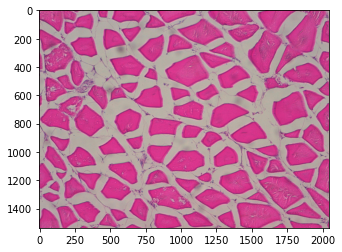

In [ ]:
%matplotlib inline
pil_im = Image.open('Foto fresco congelato/triglia fresca/81636_97.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
#pil_im = Image.open('Foto fresco congelato/triglia fresca/81636_97.jpg')
#display(pil_im)

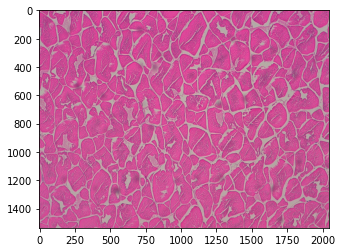

In [ ]:
def loadImages():
    # return array of images
    path="/content/Foto fresco congelato/orata congelata/"
    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages
# your images in an array
imgs = loadImages()
for img in imgs:
#    you can show every image
#    img.show()
    imshow(img)

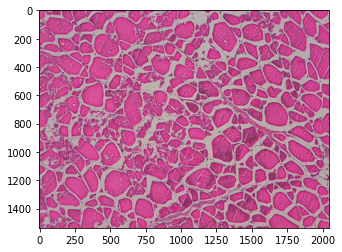

In [ ]:
def Load_dataset_fenomeni_autolitici():
    # return array of images
    path="/content/Foto fresco congelato/fenomeni autolitici/"
    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages
# your images in an array
imgs = Load_dataset_fenomeni_autolitici()
for img in imgs:
#    you can show every image
#    img.show()
    imshow(img)

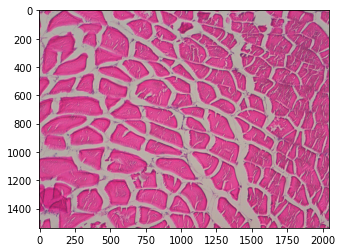

In [ ]:

def Load_dataset_triglia_fresca():
    # return array of images
    path="/content/Foto fresco congelato/triglia fresca/"
    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
    return loadedImages
# your images in an array
imgs = Load_dataset_triglia_fresca()
for img in imgs:
#    you can show every image
#    img.show()
    imshow(img)